## Análisis de los resultados
Ejemplo de simulación de un Sistema de Emergencias. En este archivo analizaremos los datos y las conclusiones que podemos sacar de las diferentes funciones.

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [24]:
df = pd.read_csv('estadisticas_incidentes.csv')

# 1. Distribución de tipo de incidentes
Este gráfico de pastel muestra la distribución porcentual de los distintos tipos de incidentes.

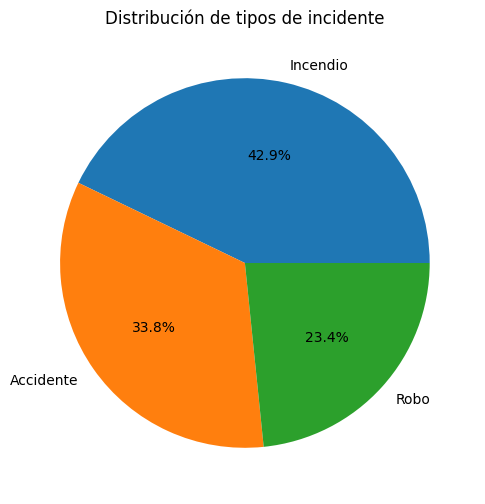

In [25]:
df['Tipo'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    title='Distribución de tipos de incidente', 
    figsize=(6,6),
    ylabel=''
)
plt.show()

## 2. Tiempos promedio por tipo de incidente
Este gráfico de barras nos muestra el tiempo promedio por tipo de incidente. En el eje 'x' tenemos el tipo de incidente, y en el eje 'y' las unidades de tiempo. El color azul representa el tiempo de espera por incidente, es decir, cuanto tiempo en promedio pasa desde que se reporta el incidente hasta que comienza a atenderse. Y el color naranja representa el tiempo que tarda en resolverse desde que se empieza a atender.

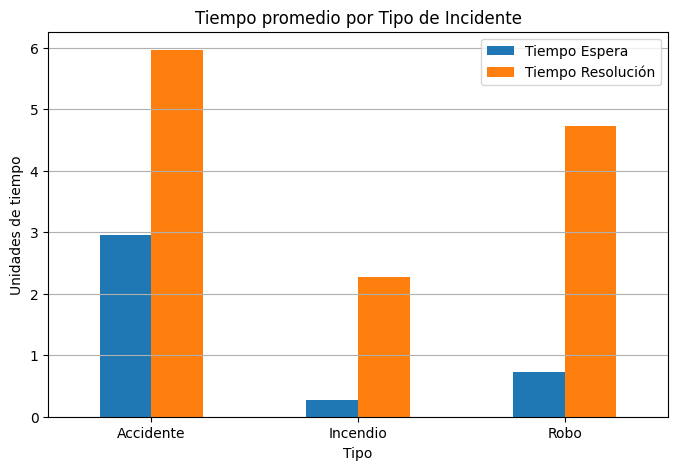

In [26]:
df.groupby('Tipo')[['Tiempo Espera', 'Tiempo Resolución']].mean().plot(
    kind='bar',
    title='Tiempo promedio por Tipo de Incidente',
    figsize=(8,5)
)

plt.ylabel('Unidades de tiempo')
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.show()

# 3. Tiempo promedio por recurso asignado
Este gráfico es un boxplot que muestra la distribución del tiempo de resolución según el recurso asignado al incidente. Es útil para ver la variabilidad, los valores típicos y atípicos. El eje 'x' muestra los recursos asignados, y el eje 'y', muestra el tiempo de resolución.

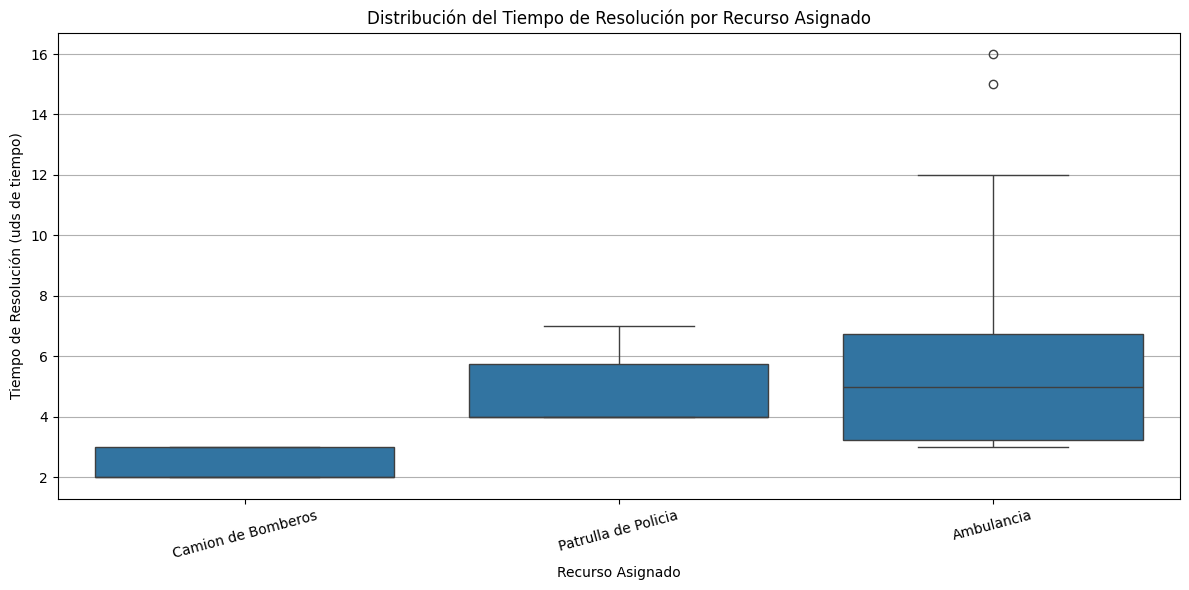

In [27]:
plt.figure(figsize=(12,6))

sns.boxplot(data=df, x='Recurso Asignado', y='Tiempo Resolución')

plt.title('Distribución del Tiempo de Resolución por Recurso Asignado')
plt.xlabel('Recurso Asignado')
plt.ylabel('Tiempo de Resolución (uds de tiempo)')
plt.xticks(rotation =15)
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

# 4. Incidentes por ubicación
Este gráfico es un diagrama de dispersión que muestra la cantidad de incidentes registrados por ubicación. El eje 'x' representa los diferentes distritos de Madrid, y el eje 'y' el numero de incidentes registrados en cada uno. Cada punto representa el número de incidentes en una ubicación específica.

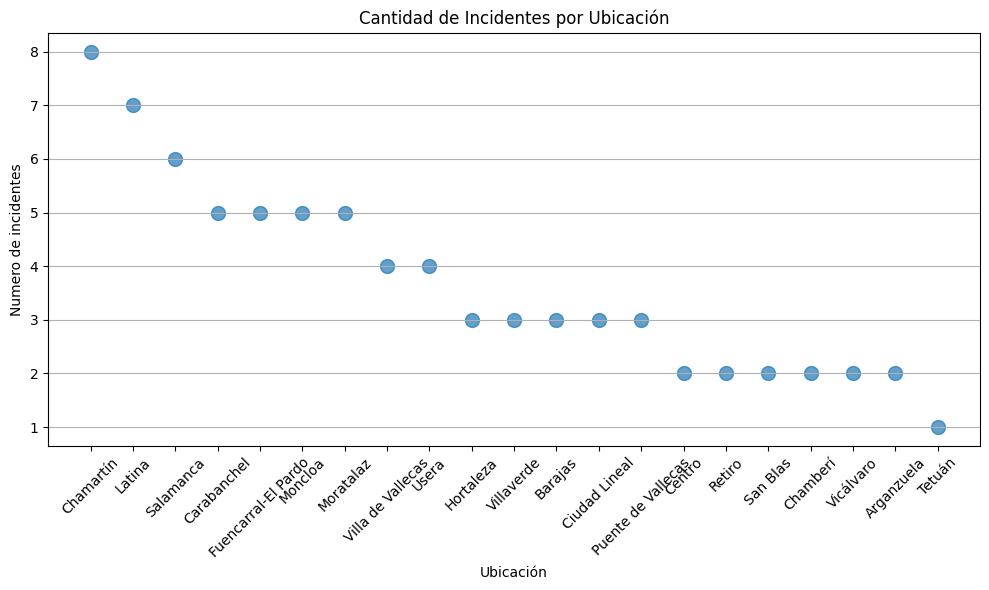

In [28]:
ubicaciones = df['Ubicación'].value_counts()

plt.figure(figsize=(10,6))
plt.scatter(ubicaciones.index, ubicaciones.values, s=100, alpha=0.7)

plt.title('Cantidad de Incidentes por Ubicación')
plt.xlabel('Ubicación')
plt.ylabel('Numero de incidentes')
plt.xticks(rotation =45)
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()


# 5. Recurso asignado segun tipo de incidentes
Este gráfico es u gráfico de barras horizontales apiladas, que muestra la cantidad de recursos asignados por tipo de incidente. El eje 'x' representa la cantidad de recursos asignados, y el eje 'y' representa los tipos de incidentes. Cada tipo de incidente esta fuertemente asociado a un solo tipo de recurso, asi evitamos la asignación innecesaria de recursos múltiples para un mismo incidente.

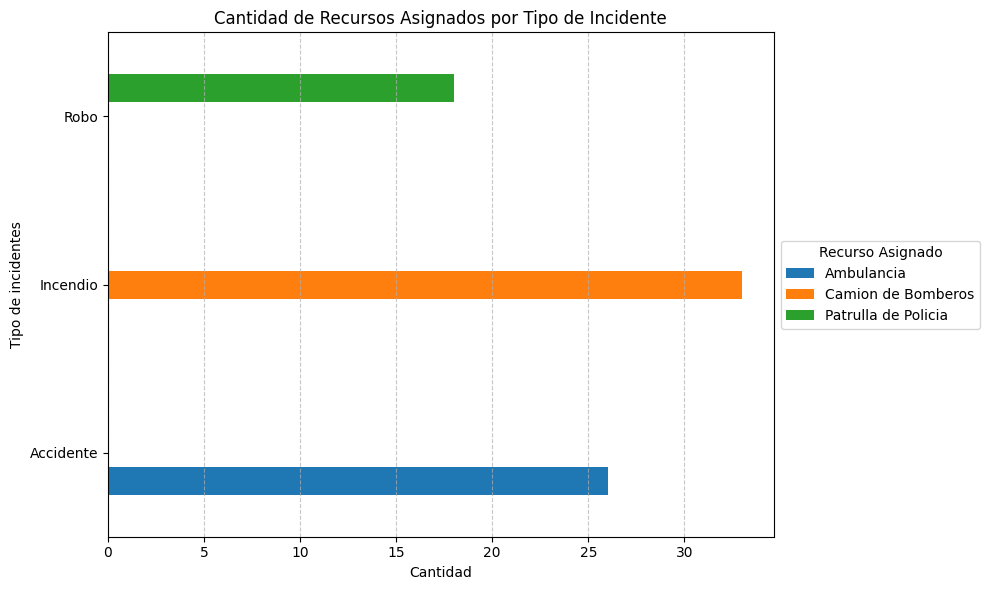

In [29]:
tabla = pd.crosstab(df['Tipo'], df['Recurso Asignado'])

tabla = tabla[['Ambulancia', 'Camion de Bomberos', 'Patrulla de Policia']]

tabla.plot(kind='barh', figsize=(10,6))

plt.title('Cantidad de Recursos Asignados por Tipo de Incidente')
plt.xlabel('Cantidad')
plt.ylabel('Tipo de incidentes')
plt.legend(title='Recurso Asignado', loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
